## Playing and Visualizing Business Foot Traffic Data

In [1]:
import pandas as pd
pd.set_option("display.max.columns", None)

dat1 = pd.read_csv('2019-05-01.csv')
dat2 = pd.read_csv('2022-05-01.csv')
dat2.head()

Unnamed: 0             PLACEKEY      PARENT_PLACEKEY SAFEGRAPH_BRAND_IDS  \
0           0  23w-222@628-p7v-nh5                  NaN                 NaN   
1           1  223-225@628-pmb-87q                  NaN                 NaN   
2           2  zzy-22j@628-pmf-sqz                  NaN                 NaN   
3           3  22r-222@628-pmb-cwk                  NaN                 NaN   
4           4  222-223@628-pmb-wff  222-222@628-pmb-wff                 NaN   

                     LOCATION_NAME BRANDS  STORE_ID  \
0         Any Garment 219 Cleaners    NaN       NaN   
1  Parkway Garage 12th and Filbert    NaN       NaN   
2          Central Parking Systems    NaN       NaN   
3                    Harry's World    NaN       NaN   
4     Holy Redeemer Chinese Church    NaN       NaN   

                       TOP_CATEGORY  \
0  Drycleaning and Laundry Services   
1           Other Personal Services   
2           Other Personal Services   
3           Other Personal Services   
4           Religious Organizations   

                                        SUB_CATEGORY  NAICS_CODE   LATITUDE  \
0  Drycleaning and Laundry Services (except Coin-...      812320  40.062762   
1                           Parking Lots and Garages      812930  39.953239   
2                           Parking Lots and Garages      812930  39.950398   
3                        All Other Personal Services      812990  39.943098   
4                            Religious Organizations      813110  39.957451   

   LONGITUDE         STREET_ADDRESS          CITY REGION  POSTAL_CODE  \
0 -75.084276  7350 Oxford Ave Ste B  Philadelphia     PA        19111   
1 -75.160116        1201 Filbert St  Philadelphia     PA        19107   
2 -75.167955     1616 Chancellor St  Philadelphia     PA        19103   
3 -75.162233          1210 South St  Philadelphia     PA        19147   
4 -75.154776            915 Vine St  Philadelphia     PA        19107   

                                          OPEN_HOURS CATEGORY_TAGS OPENED_ON  \
0  { "Mon": [["7:00", "19:00"]], "Tue": [["7:00",...           NaN       NaN   
1  { "Mon": [["0:00", "24:00"]], "Tue": [["0:00",...           NaN       NaN   
2                                                NaN           NaN       NaN   
3  { "Mon": [["10:00", "18:30"]], "Tue": [["10:00...           NaN       NaN   
4                                                NaN      Churches       NaN   

  CLOSED_ON    TRACKING_CLOSED_SINCE                WEBSITES GEOMETRY_TYPE  \
0       NaN  2019-07-01 00:00:00.000                     NaN       POLYGON   
1       NaN  2019-07-01 00:00:00.000         parkwaycorp.com       POLYGON   
2       NaN  2019-07-01 00:00:00.000                     NaN       POLYGON   
3       NaN  2019-07-01 00:00:00.000  harrysworldsouthst.com       POLYGON   
4       NaN  2019-07-01 00:00:00.000                     NaN       POLYGON   

                                         POLYGON_WKT   POLYGON_CLASS  \
0  POLYGON ((-75.08447700699998 40.06284127300006...  SHARED_POLYGON   
1  POLYGON ((-75.16002417282222 39.95337396001809...   OWNED_POLYGON   
2  POLYGON ((-75.1677503213953 39.95050178388545,...  SHARED_POLYGON   
3  POLYGON ((-75.1623453 39.94269762600004, -75.1...  SHARED_POLYGON   
4  POLYGON ((-75.15468547899997 39.95769457000006...  SHARED_POLYGON   

   ENCLOSED  PHONE_NUMBER  IS_SYNTHETIC INCLUDES_PARKING_LOT ISO_COUNTRY_CODE  \
0     False  1.215743e+10         False                False               US   
1     False  1.215575e+10         False                False               US   
2     False  1.215735e+10         False                False               US   
3     False  1.215309e+10         False                False               US   
4     False  1.215923e+10         False                False               US   

   WKT_AREA_SQ_METERS         DATE_RANGE_START           DATE_RANGE_END  \
0              3237.0  2022-05-01 00:00:00.000  2022-06-01 00:00:00.000   
1               410.0  2022-

In [12]:
from shapely.geometry import Point
import geopandas as gpd

geometry2 = [Point(xy) for xy in zip(dat2['LONGITUDE'], dat2['LATITUDE'])]
geometry1 = [Point(xy) for xy in zip(dat1['LONGITUDE'], dat1['LATITUDE'])]

gdat2 = gpd.GeoDataFrame(dat2, geometry=geometry2, crs = 'EPSG:4326')
gdat1 = gpd.GeoDataFrame(dat1, geometry=geometry1, crs = 'EPSG:4326')

In [5]:
print(gdat2.columns)

Index(['Unnamed: 0', 'PLACEKEY', 'PARENT_PLACEKEY', 'SAFEGRAPH_BRAND_IDS',
       'LOCATION_NAME', 'BRANDS', 'STORE_ID', 'TOP_CATEGORY', 'SUB_CATEGORY',
       'NAICS_CODE', 'LATITUDE', 'LONGITUDE', 'STREET_ADDRESS', 'CITY',
       'REGION', 'POSTAL_CODE', 'OPEN_HOURS', 'CATEGORY_TAGS', 'OPENED_ON',
       'CLOSED_ON', 'TRACKING_CLOSED_SINCE', 'WEBSITES', 'GEOMETRY_TYPE',
       'POLYGON_WKT', 'POLYGON_CLASS', 'ENCLOSED', 'PHONE_NUMBER',
       'IS_SYNTHETIC', 'INCLUDES_PARKING_LOT', 'ISO_COUNTRY_CODE',
       'WKT_AREA_SQ_METERS', 'DATE_RANGE_START', 'DATE_RANGE_END',
       'RAW_VISIT_COUNTS', 'RAW_VISITOR_COUNTS', 'VISITS_BY_DAY', 'POI_CBG',
       'VISITOR_HOME_CBGS', 'VISITOR_HOME_AGGREGATION', 'VISITOR_DAYTIME_CBGS',
       'VISITOR_COUNTRY_OF_ORIGIN', 'DISTANCE_FROM_HOME', 'MEDIAN_DWELL',
       'BUCKETED_DWELL_TIMES', 'RELATED_SAME_DAY_BRAND',
       'RELATED_SAME_MONTH_BRAND', 'POPULARITY_BY_HOUR', 'POPULARITY_BY_DAY',
       'DEVICE_TYPE', 'NORMALIZED_VISITS_BY_STATE_SCALING'

In [ ]:
import matplotlib.pyplot as plt
import contextily as ctx
import folium
from folium.plugins import HeatMap

center_lat = gdat2['LATITUDE'].mean()
center_lon = gdat2['LONGITUDE'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=12, 
               tiles='CartoDB positron') 

# Prepare heatmap data: [[lat, lon, intensity], ...]
heat_data = [[row['LATITUDE'], row['LONGITUDE'], row['RAW_VISIT_COUNTS']]  
             for idx, row in gdat2.iterrows() if not pd.isna(row['RAW_VISIT_COUNTS'])]

# Add heatmap layer
HeatMap(heat_data, radius=15, blur=10, max_zoom=13).add_to(m)

In [26]:
m

/var/folders/mm/m098rbs1529c7x072qh31ncw0000gn/T/ipykernel_41175/1493597111.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Total_Visitors', y='TOP_CATEGORY', data=groupdat2, palette='mako')


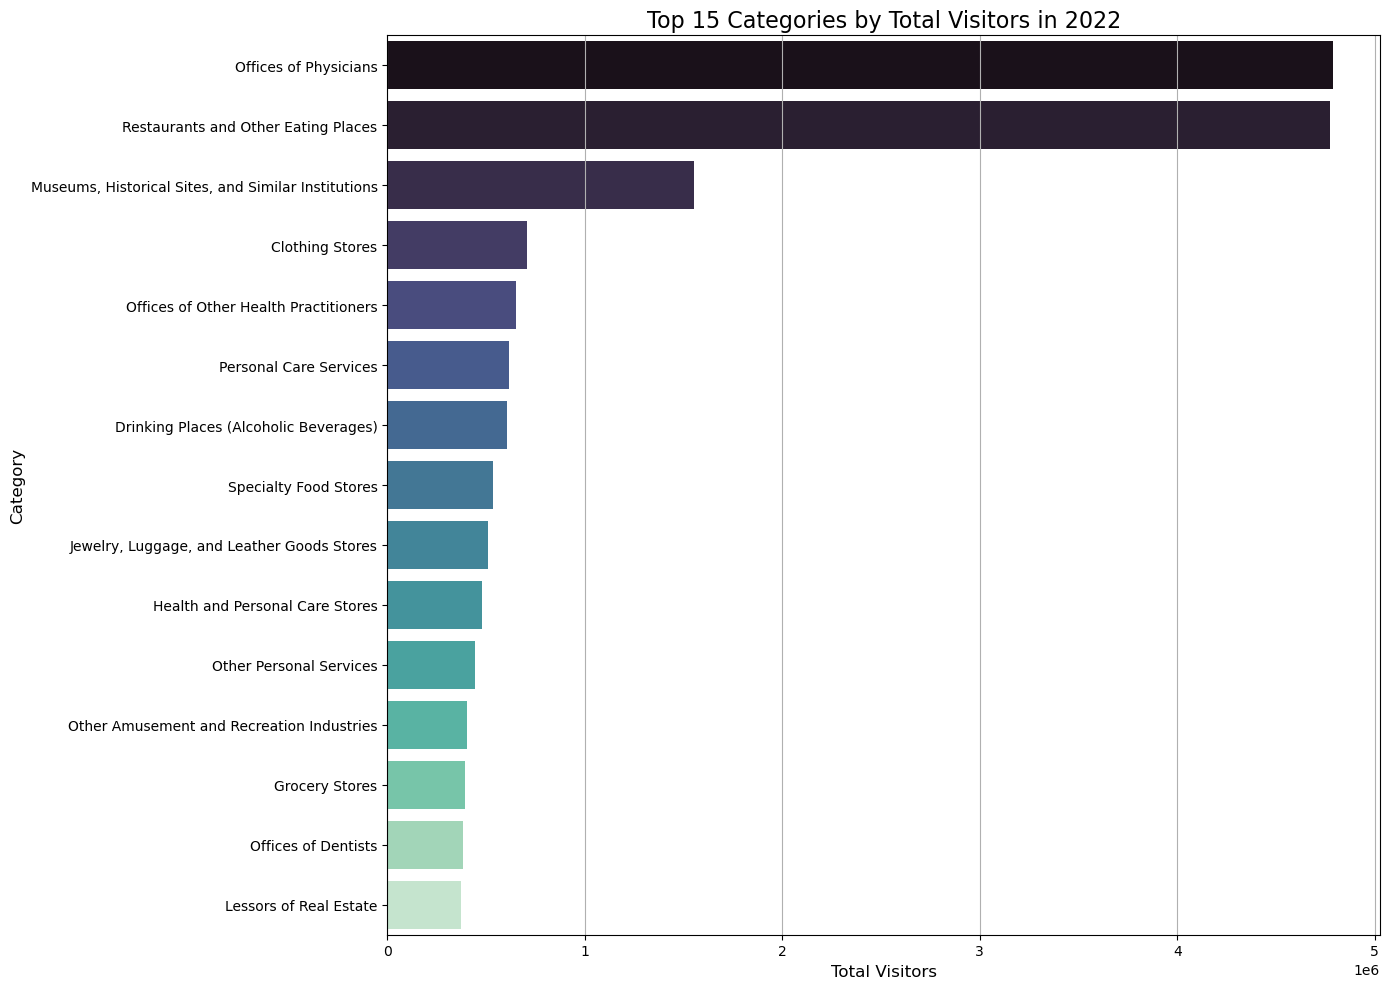

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

groupdat2 = dat2.groupby('TOP_CATEGORY')['RAW_VISITOR_COUNTS'].sum().reset_index(name='Total_Visitors')
groupdat2 = groupdat2.sort_values('Total_Visitors', ascending=False).head(15)
groupdat1 = dat1.groupby('TOP_CATEGORY')['RAW_VISITOR_COUNTS'].sum().reset_index(name='Total_Visitors')
groupdat1 = groupdat1.sort_values('Total_Visitors', ascending=False).head(15)

plt.figure(figsize=(14, 10))
ax = sns.barplot(x='Total_Visitors', y='TOP_CATEGORY', data=groupdat2, palette='mako')
plt.title('Top 15 Categories by Total Visitors in 2022', fontsize=16)
plt.xlabel('Total Visitors', fontsize=12)
plt.ylabel('Category', fontsize=12)

# Add a grid for better readability
ax.grid(True, axis='x')

# Format y-axis to avoid clipping
plt.tight_layout()
plt.show()

/var/folders/mm/m098rbs1529c7x072qh31ncw0000gn/T/ipykernel_41175/3606149343.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Total_Visitors', y='TOP_CATEGORY', data=groupdat1, palette='mako')


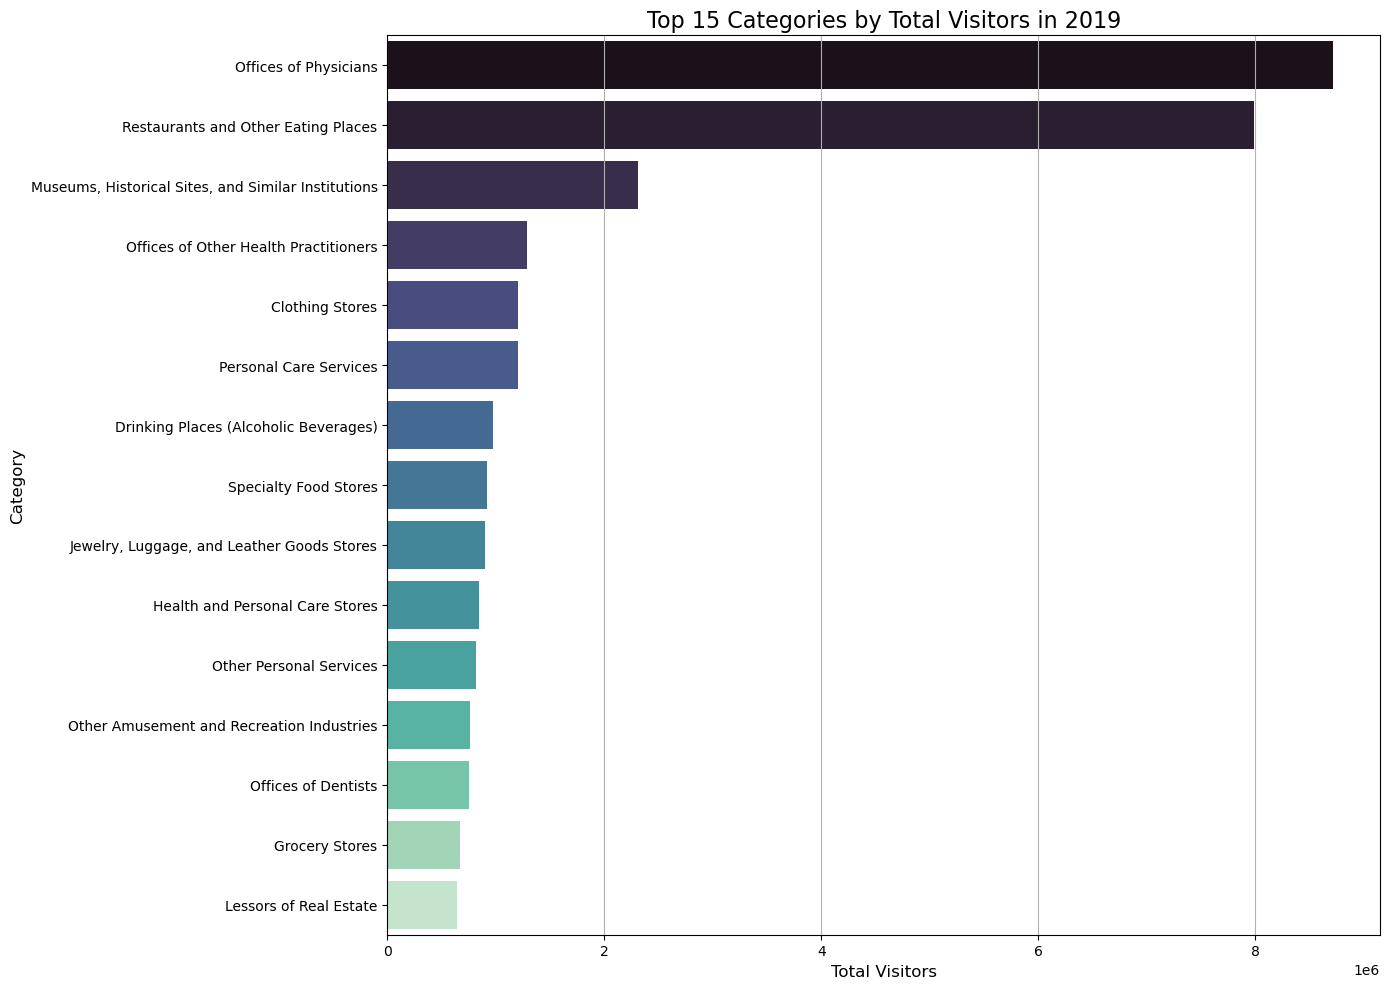

In [ ]:
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='Total_Visitors', y='TOP_CATEGORY', data=groupdat1, palette='mako')
plt.title('Top 15 Categories by Total Visitors in 2019', fontsize=16)
plt.xlabel('Total Visitors', fontsize=12)
plt.ylabel('Category', fontsize=12)

# Add a grid for better readability
ax.grid(True, axis='x')

# Format y-axis to avoid clipping
plt.tight_layout()
plt.show()

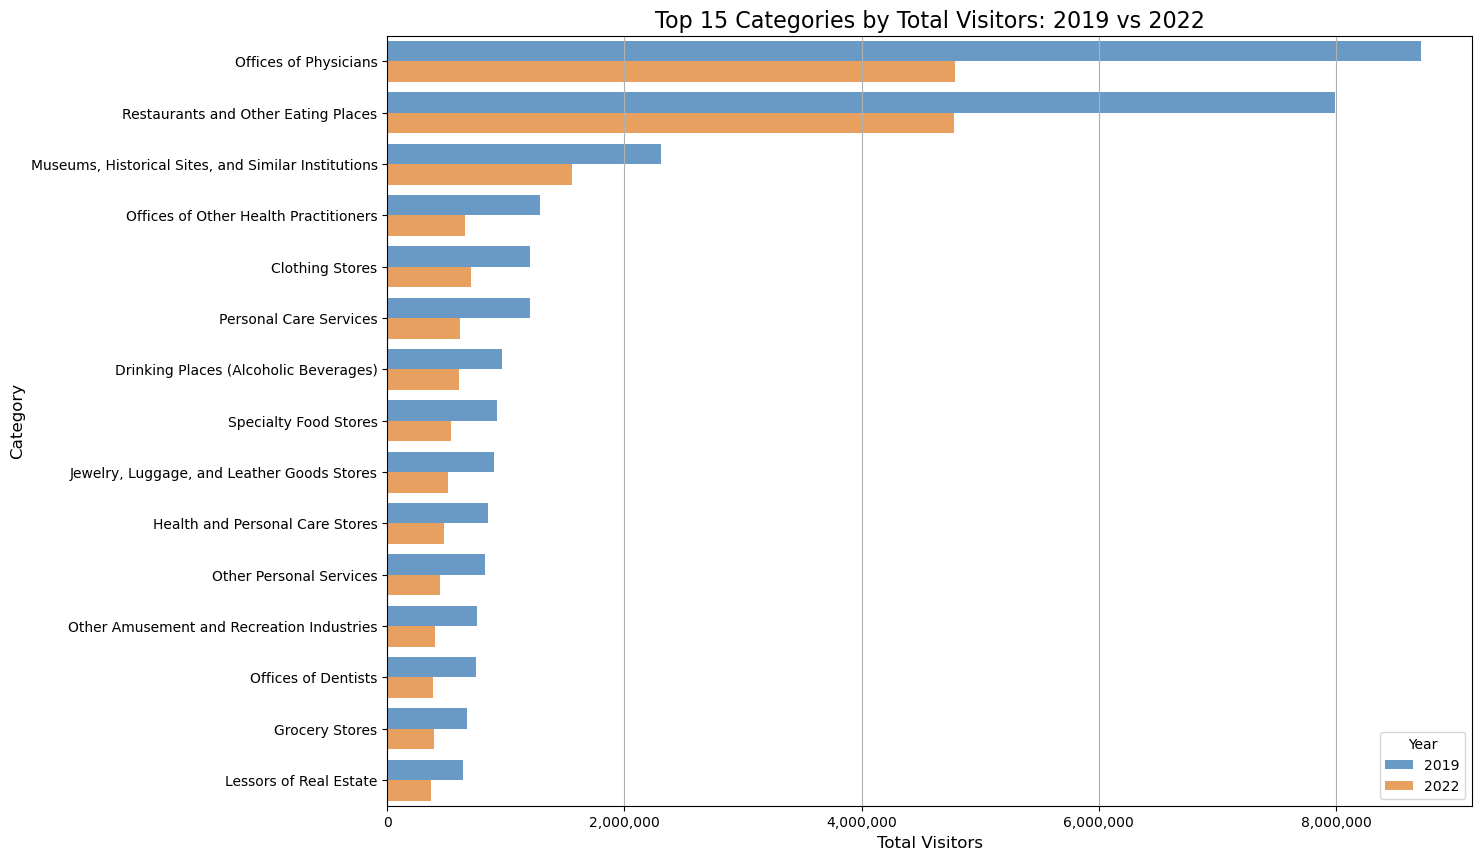

In [11]:
from matplotlib.ticker import FuncFormatter
all_top_categories = pd.concat([
    groupdat1[['TOP_CATEGORY']],
    groupdat2[['TOP_CATEGORY']]
]).drop_duplicates()

# Now merge with the original dataframes to get all values
merged_2019 = pd.merge(all_top_categories, groupdat1, on='TOP_CATEGORY', how='left').fillna(0)
merged_2022 = pd.merge(all_top_categories, groupdat2, on='TOP_CATEGORY', how='left').fillna(0)

# Create a combined dataframe for plotting
plot_data = pd.DataFrame({
    'TOP_CATEGORY': merged_2019['TOP_CATEGORY'],
    '2019': merged_2019['Total_Visitors'],
    '2022': merged_2022['Total_Visitors']
})

# Get the top 15 categories based on the sum of both years
plot_data['Total'] = plot_data['2019'] + plot_data['2022']
plot_data = plot_data.sort_values('Total', ascending=False).head(15)

# Reshape the data for seaborn
plot_data_melted = pd.melt(
    plot_data, 
    id_vars=['TOP_CATEGORY'], 
    value_vars=['2019', '2022'],
    var_name='Year', 
    value_name='Total_Visitors'
)

# Set up the figure
plt.figure(figsize=(14, 10))

# Create the grouped bar chart
ax = sns.barplot(
    x='Total_Visitors', 
    y='TOP_CATEGORY', 
    hue='Year',
    data=plot_data_melted,
    palette=['#5A9BD5', '#FF9E4A']  # Blue for 2019, Orange for 2022
)

# Add a title and labels
plt.title('Top 15 Categories by Total Visitors: 2019 vs 2022', fontsize=16)
plt.xlabel('Total Visitors', fontsize=12)
plt.ylabel('Category', fontsize=12)

# Add a grid for better readability
ax.grid(True, axis='x')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add a legend with a better position
plt.legend(title='Year', loc='lower right')

In [14]:
districts = gpd.read_file('https://opendata.arcgis.com/api/v3/datasets/1ba5a5d68f4a4c75806e78b1d9245924_0/downloads/data?format=geojson&spatialRefId=4326&where=1%3D1')

In [15]:
biz_dist2 = gpd.sjoin(gdat2, districts, how='left', predicate='intersects')
dist_cons2 = biz_dist2.groupby('DISTRICT')['RAW_VISITOR_COUNTS'].sum().reset_index(name='Total_Visitors')
biz_dist1 = gpd.sjoin(gdat1, districts, how='left', predicate='intersects')
dist_cons1 = biz_dist1.groupby('DISTRICT')['RAW_VISITOR_COUNTS'].sum().reset_index(name='Total_Visitors')
dist_cons2.head()

DISTRICT  Total_Visitors
0        1       7537786.0
1       10        919776.0
2        2       6241671.0
3        3       4230957.0
4        4       1887993.0

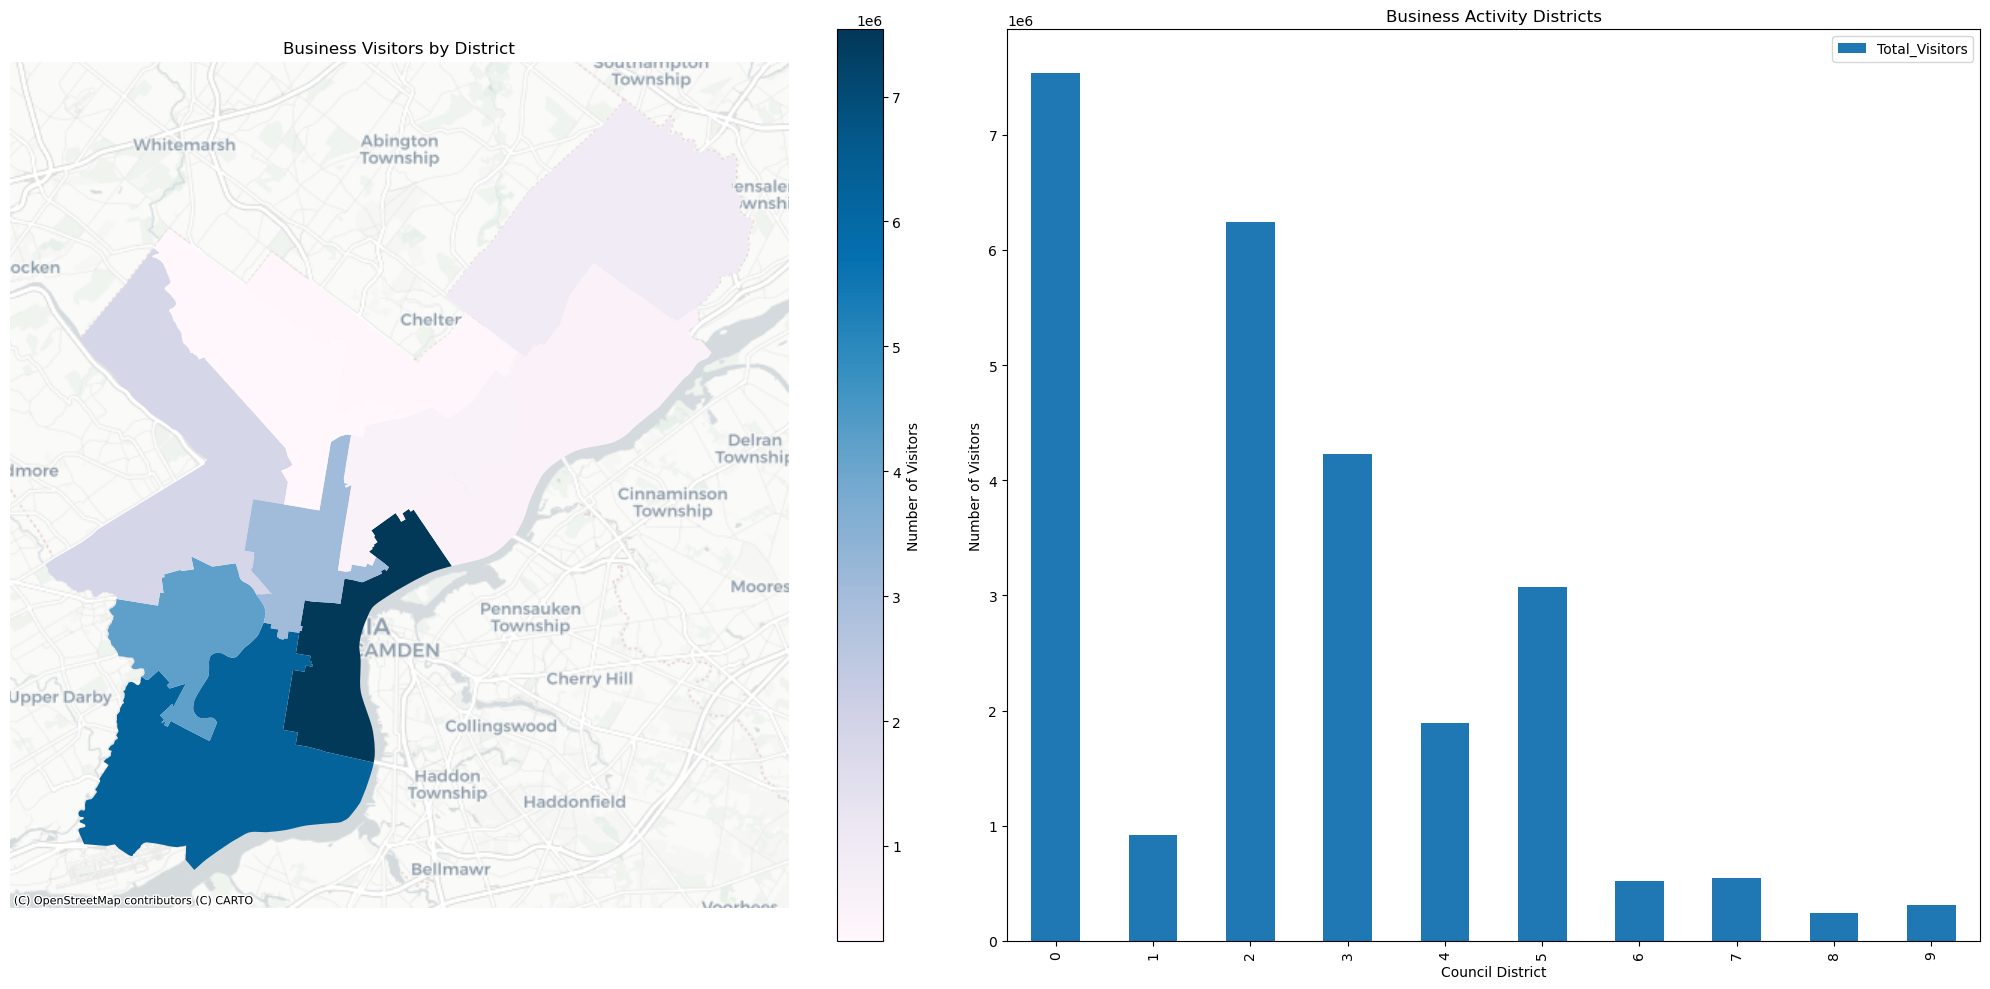

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

merged_data1 = districts.merge(dist_cons1, on='DISTRICT', how='left')
merged_data1 = merged_data1.to_crs(epsg=3857)
merged_data2 = districts.merge(dist_cons2, on='DISTRICT', how='left')
merged_data2 = merged_data2.to_crs(epsg=3857)

merged_data.plot(column='Total_Visitors', 
                ax=ax1,
                legend=True,
                cmap='PuBu',
                legend_kwds={'label': 'Number of Visitors'},
                missing_kwds={'color': 'lightgrey'})

# Basemap
ctx.add_basemap(ax1, source=ctx.providers.CartoDB.Positron)
ax1.set_axis_off()
ax1.set_title('Business Visitors by District')

plt.show()

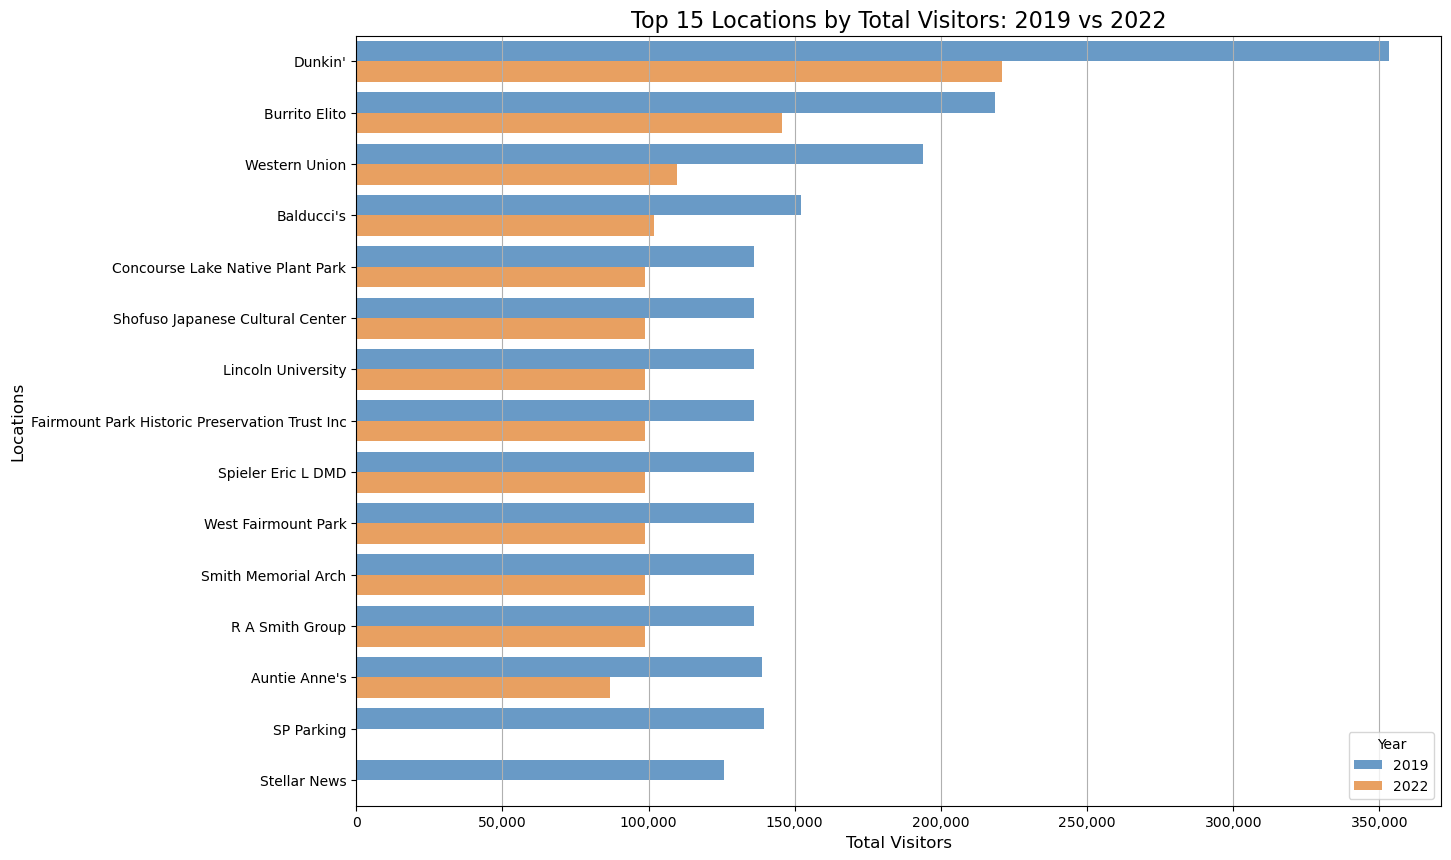

In [16]:
bigbiz1 = dat1.groupby('LOCATION_NAME')['RAW_VISITOR_COUNTS'].sum().reset_index(name='Total_Visitors')
bigbiz1 = bigbiz1.sort_values('Total_Visitors', ascending=False).head(15)
bigbiz2 = dat2.groupby('LOCATION_NAME')['RAW_VISITOR_COUNTS'].sum().reset_index(name='Total_Visitors')
bigbiz2 = bigbiz2.sort_values('Total_Visitors', ascending=False).head(15)


all_top_categories = pd.concat([
    bigbiz1[['LOCATION_NAME']],
    bigbiz2[['LOCATION_NAME']]
]).drop_duplicates()

# Now merge with the original dataframes to get all values
merged_2019 = pd.merge(all_top_categories, bigbiz1, on='LOCATION_NAME', how='left').fillna(0)
merged_2022 = pd.merge(all_top_categories, bigbiz2, on='LOCATION_NAME', how='left').fillna(0)

# Create a combined dataframe for plotting
plot_data = pd.DataFrame({
    'LOCATION_NAME': merged_2019['LOCATION_NAME'],
    '2019': merged_2019['Total_Visitors'],
    '2022': merged_2022['Total_Visitors']
})

# Get the top 15 categories based on the sum of both years
plot_data['Total'] = plot_data['2019'] + plot_data['2022']
plot_data = plot_data.sort_values('Total', ascending=False).head(15)

# Reshape the data for seaborn
plot_data_melted = pd.melt(
    plot_data, 
    id_vars=['LOCATION_NAME'], 
    value_vars=['2019', '2022'],
    var_name='Year', 
    value_name='Total_Visitors'
)

# Set up the figure
plt.figure(figsize=(14, 10))

# Create the grouped bar chart
ax = sns.barplot(
    x='Total_Visitors', 
    y='LOCATION_NAME', 
    hue='Year',
    data=plot_data_melted,
    palette=['#5A9BD5', '#FF9E4A']  # Blue for 2019, Orange for 2022
)

# Add a title and labels
plt.title('Top 15 Locations by Total Visitors: 2019 vs 2022', fontsize=16)
plt.xlabel('Total Visitors', fontsize=12)
plt.ylabel('Locations', fontsize=12)

# Add a grid for better readability
ax.grid(True, axis='x')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add a legend with a better position
plt.legend(title='Year', loc='lower right')

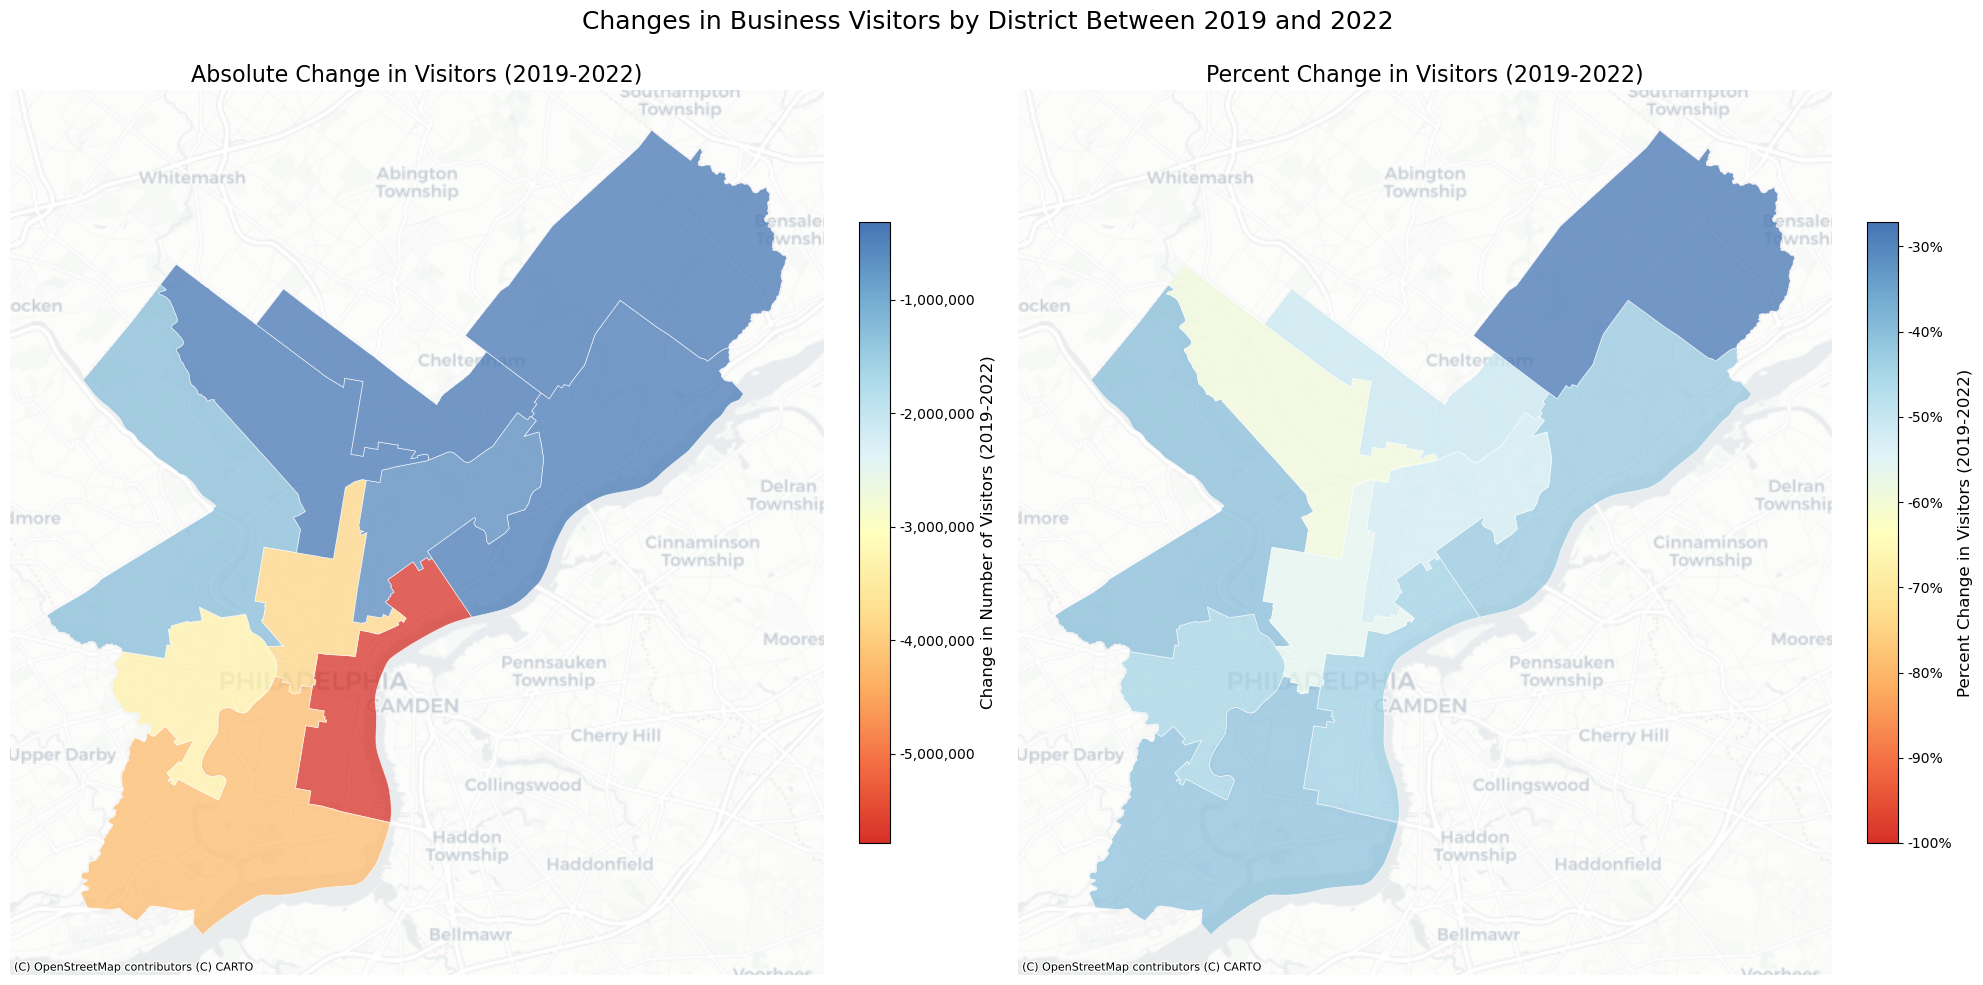

In [22]:
import matplotlib.pyplot as plt
import contextily as ctx
import matplotlib.colors as colors
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as mticker
import pandas as pd

# Rename columns to distinguish between 2019 and 2022 data
dist_cons1 = dist_cons1.rename(columns={'Total_Visitors': 'Visitors_2019'})
dist_cons2 = dist_cons2.rename(columns={'Total_Visitors': 'Visitors_2022'})

# Merge the two dataframes
merged_districts = pd.merge(dist_cons1, dist_cons2, on='DISTRICT', how='outer')

# Fill NaN values with 0 (for districts that might only appear in one year)
merged_districts = merged_districts.fillna(0)

# Calculate absolute change and percent change
merged_districts['Change'] = merged_districts['Visitors_2022'] - merged_districts['Visitors_2019']
merged_districts['Percent_Change'] = (merged_districts['Change'] / merged_districts['Visitors_2019']) * 100

# Merge with the geometries
final_map_data = districts.merge(merged_districts, on='DISTRICT', how='left')

# Convert to Web Mercator for contextily basemap
final_map_data = final_map_data.to_crs(epsg=3857)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Create a diverging colormap for change (red for decrease, blue for increase)
cmap_div = LinearSegmentedColormap.from_list(
    'change_cmap', 
    ['#d73027', '#f46d43', '#fdae61', '#fee090', '#ffffbf', '#e0f3f8', '#abd9e9', '#74add1', '#4575b4']
)

# Define normalization for both maps
vmin1 = final_map_data['Change'].min()
vmax1 = final_map_data['Change'].max()
norm1 = colors.Normalize(vmin=vmin1, vmax=vmax1)

vmin2 = -100  # Percent change min (-100%)
vmax2 = final_map_data['Percent_Change'].max()
# Cap maximum percent change at 100% for better visualization
vmax2 = min(vmax2, 100)
norm2 = colors.Normalize(vmin=vmin2, vmax=vmax2)

# Plot 1: Absolute Change
final_map_data.plot(
    column='Change',
    ax=ax1,
    cmap=cmap_div,
    norm=norm1,
    edgecolor='white',
    linewidth=0.5,
    alpha=0.75,
    missing_kwds={'color': 'lightgrey', 'label': 'No Data'}
)

# Add a colorbar for absolute change
sm1 = plt.cm.ScalarMappable(cmap=cmap_div, norm=norm1)
sm1.set_array([])
cbar1 = fig.colorbar(sm1, ax=ax1, fraction=0.035, pad=0.04)
cbar1.set_label('Change in Number of Visitors (2019-2022)', fontsize=12)
cbar1.ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Add basemap for absolute change
ctx.add_basemap(ax1, source=ctx.providers.CartoDB.Positron, alpha=0.5)

# Remove axis and add title for absolute change
ax1.set_axis_off()
ax1.set_title('Absolute Change in Visitors (2019-2022)', fontsize=16)

# Plot 2: Percent Change
final_map_data.plot(
    column='Percent_Change',
    ax=ax2,
    cmap=cmap_div,
    norm=norm2,
    edgecolor='white',
    linewidth=0.5,
    alpha=0.75,
    missing_kwds={'color': 'lightgrey', 'label': 'No Data'}
)

# Add a colorbar for percent change
sm2 = plt.cm.ScalarMappable(cmap=cmap_div, norm=norm2)
sm2.set_array([])
cbar2 = fig.colorbar(sm2, ax=ax2, fraction=0.035, pad=0.04)
cbar2.set_label('Percent Change in Visitors (2019-2022)', fontsize=12)
cbar2.ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f"{x:.0f}%"))

# Add basemap for percent change
ctx.add_basemap(ax2, source=ctx.providers.CartoDB.Positron, alpha=0.5)

# Remove axis and add title for percent change
ax2.set_axis_off()
ax2.set_title('Percent Change in Visitors (2019-2022)', fontsize=16)


# Add a suptitle for the figure
plt.suptitle('Changes in Business Visitors by District Between 2019 and 2022', fontsize=18, y=0.98)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

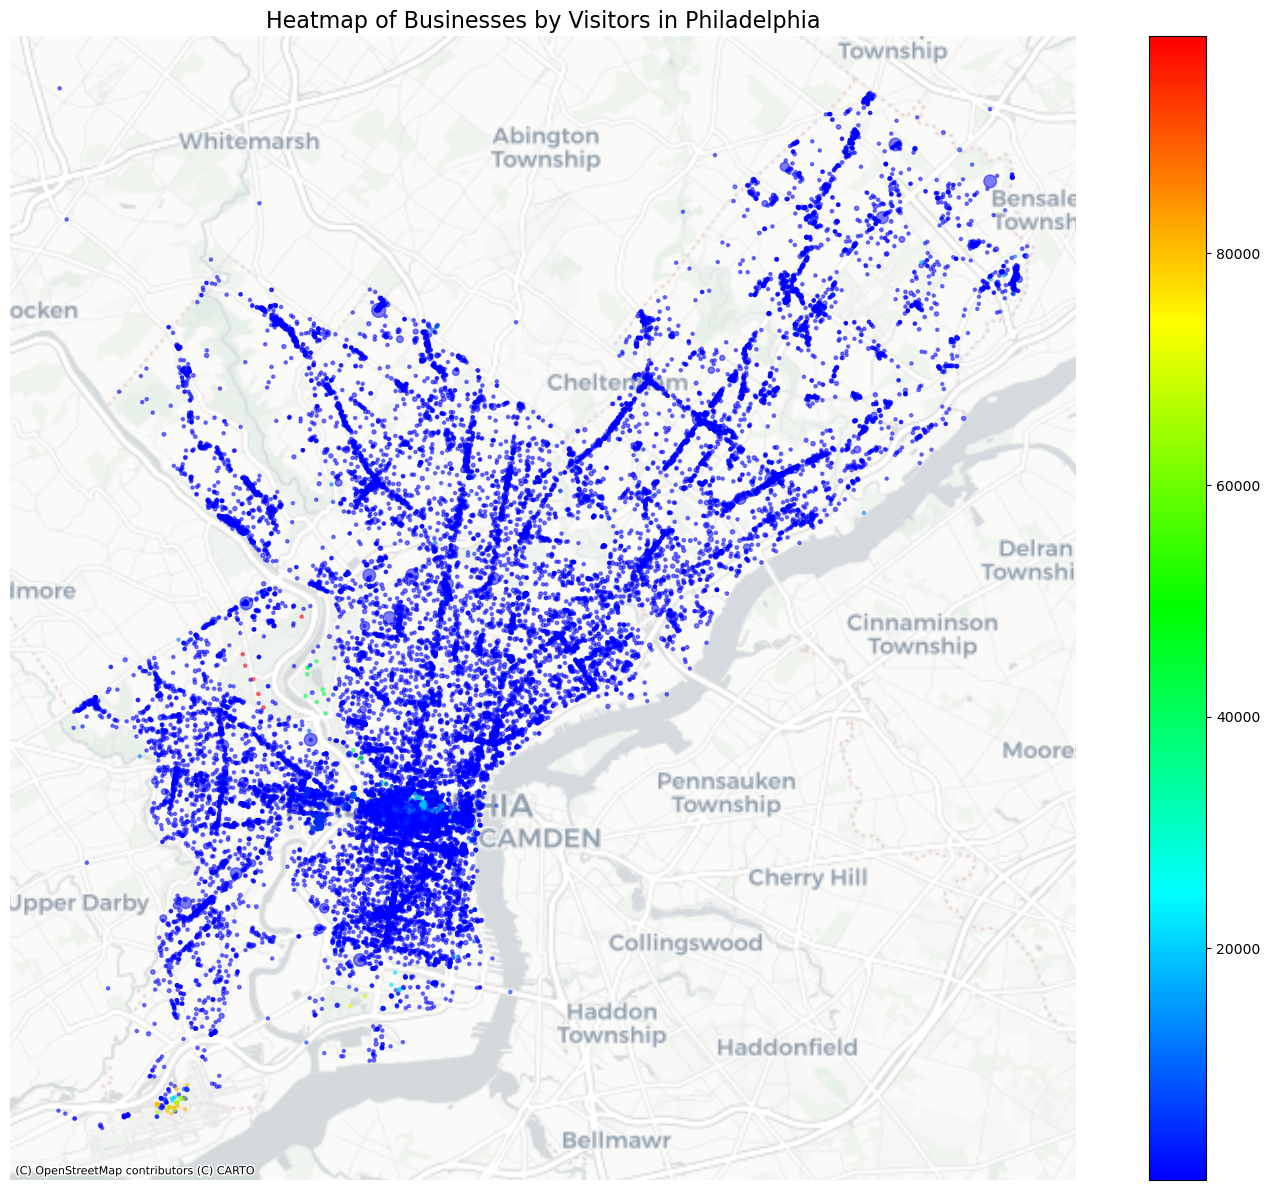

In [33]:
import matplotlib.pyplot as plt
import contextily as ctx
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import geopandas as gpd
from shapely.geometry import box

philly_bbox = (-75.280303, 39.867004, -74.955833, 40.137992)

# Create a box geometry for Philadelphia
philly_box = box(*philly_bbox)

# Filter the data to only include points within Philadelphia's bounding box
gdat_philly = gdat2[gdat2.geometry.within(philly_box)]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 12))

# Project to Web Mercator for compatibility with contextily basemap
gdat_philly_projected = gdat_philly.to_crs(epsg=3857)

# Plot the points colored by RAW_VISITOR_COUNTS with alpha transparency
vmin = gdat_philly['RAW_VISITOR_COUNTS'].min()
vmax = gdat_philly['RAW_VISITOR_COUNTS'].max()

# Create a custom colormap from blue to red
colors = ["#0000ff", "#00ffff", "#00ff00", "#ffff00", "#ff0000"]
cmap = LinearSegmentedColormap.from_list("visitor_cmap", colors)

# Create the scatter plot with point size also based on visitor count
scatter = gdat_philly_projected.plot(
    column='RAW_VISITOR_COUNTS',
    cmap=cmap,
    alpha=0.5,
    markersize=5 + (gdat_philly['RAW_VISITOR_COUNTS'] - gdat_philly['RAW_VISITOR_COUNTS'].min()) / 
          (gdat_philly['RAW_VISITOR_COUNTS'].max() - gdat_philly['RAW_VISITOR_COUNTS'].min()) * 95,  # Scale point size
    legend=True,
    ax=ax
)

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Set title and labels
plt.title('Heatmap of Businesses by Visitors in Philadelphia', fontsize=16)
ax.set_axis_off()

# Improve the layout
plt.tight_layout()


# Show the plot
plt.show()